<h1><center>Milestone 1</center></h1>
<h3> <center>Hold 05 - Project group 22 </center> </h3>
<center>Rune Ejnar Bang Lejbølle (nvr889@alumni.ku.dk)</center>
<center>Pedram Bakhtiarifard (lcd842@alumni.ku.dk)</center>

# Task 2

In order to work with the dataset, we first download and write it to a file, in order to ensure we have a local copy of the dataset that will not suddenly change. This data is the working copy we will be using throughout this project milestone. To gain access to the data we send a request to the webpage using the _requests_ library.

In [1]:
import requests

response = requests.get("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv")
data_file = open('data.csv', 'wb')
data_file.write(response.content)
data_file.close()

Next, we load the data into a Pandas dataframe, in order to have the data in a format that is easy to work with in Python. If one did not care about having a local copy, this could have also been done directly from the URL of the dataset.

In [2]:
import pandas as pd

# Load from local CSV-file
data = pd.read_csv("data.csv", index_col=0)

# Load directly from URL
# data = pd.read_csv("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv", index_col=0)

data

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,39259,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2017/12/priso...,"Prison for Rahm, God’s Work And Many Others\n\...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Prison for Rahm, God’s Work And Many Others",NaN,NaN,[''],NaN,NaN,NaN
246,39468,beforeitsnews.com,fake,http://beforeitsnews.com/diy/2017/11/4-useful-...,4 Useful Items for Your Tiny Home\n\nHeadline:...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,4 Useful Items for Your Tiny Home,Dimitry K,NaN,[''],NaN,NaN,NaN
247,39477,www.newsmax.com,NaN,https://www.newsmax.com/politics/michael-hayde...,Former CIA Director Michael Hayden said Thursd...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Michael Hayden: We Should Be 'Frightened' by T...,Todd Beamon,NaN,"['michael hayden', 'sthole countries', 'daca',...",President Donald Trump's reported remarks abou...,"Homeland Security, Trump Administration, Immig...",NaN
248,39550,www.newsmax.com,NaN,https://www.newsmax.com/newsfront/antonio-saba...,Antonio Sabato Jr. says Hollywood's liberal el...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Antonio Sabato Jr.: It's Oprah or Bust for Hol...,Bill Hoffmann,NaN,"['antonio sabato jr', 'oprah winfrey', 'presid...",Antonio Sabato Jr. says Hollywood's liberal el...,"Trump Administration, ISIS/Islamic State, News...",NaN


Now, we clean the _content_ column of the data using the `clean` function from the library `cleantext`. This way, we remove all punctuation, make all text lowercase, and replace things like numbers and emails with special identifiers `<NUM>` and `<EMAIL>`. This makes the text simpler, by removing elements of the text that have little or no meaning, or can be hard to extract meaning from. We save the cleaned content in a new column, so we still have easy access to the original content.

In [3]:
from cleantext import clean

data['cleaned_content'] = data['content'].apply(lambda x: clean(x, no_numbers=True, no_line_breaks=True, no_emails=True, no_urls=True, no_punct=True, replace_with_number="<NUM>", replace_with_email='<EMAIL>', replace_with_url='<URL>'))

data

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,cleaned_content
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN,sometimes the power of christmas will make you...
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN,awakening of <num> strands of dna reconnecting...
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN,never hike alone a friday the 13th fan film us...
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN,when a rare shark was caught scientists were l...
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN,donald trump has the unnerving ability to abil...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,39259,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2017/12/priso...,"Prison for Rahm, God’s Work And Many Others\n\...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Prison for Rahm, God’s Work And Many Others",NaN,NaN,[''],NaN,NaN,NaN,prison for rahm gods work and many others head...
246,39468,beforeitsnews.com,fake,http://beforeitsnews.com/diy/2017/11/4-useful-...,4 Useful Items for Your Tiny Home\n\nHeadline:...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,4 Useful Items for Your Tiny Home,Dimitry K,NaN,[''],NaN,NaN,NaN,<num> useful items for your tiny home headline...
247,39477,www.newsmax.com,NaN,https://www.newsmax.com/politics/michael-hayde...,Former CIA Director Michael Hayden said Thursd...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Michael Hayden: We Should Be 'Frightened' by T...,Todd Beamon,NaN,"['michael hayden', 'sthole countries', 'daca',...",President Donald Trump's reported remarks abou...,"Homeland Security, Trump Administration, Immig...",NaN,former cia director michael hayden said thursd...
248,39550,www.newsmax.com,NaN,https://www.newsmax.com/newsfront/antonio-saba...,Antonio Sabato Jr. says Hollywood's liberal el...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Antonio Sabato Jr.: It's Oprah or Bust for Hol...,Bill Hoffmann,NaN,"['antonio sabato jr', 'oprah winfrey', 'presid...",Antonio Sabato Jr. says Hollywood's liberal el...,"Trump Administration, ISIS/Islamic State, News...",NaN,antonio sabato jr says hollywoods liberal elit...


In the next step, we tokenize, remove stopwords, and stem the _cleaned_content_ using the `nltk` library. This helps create a normalized text representation, remove redundancy in the database, and equate similar words in the vocabulary, and also removes some words that carry little or no meaning. We again keep the result of each processing step seperate, as this allows us to retrace, access and compare our data to earlier steps.

In [4]:
import nltk

nltk.download('stopwords')

tokenizer = nltk.RegexpTokenizer(r'\w+|<\w+>')

data['tokenized_content'] = data['cleaned_content'].apply(tokenizer.tokenize)

def filter_stopwords(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    return [x for x in tokens if not x in stopwords]

data['nostop_content'] = data['tokenized_content'].apply(filter_stopwords)

def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    return list(map(stemmer.stem, tokens))

data['stemmed_content'] = data['nostop_content'].apply(stem_tokens)

data

[nltk_data] Downloading package stopwords to /home/ped/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,cleaned_content,tokenized_content,nostop_content,stemmed_content
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN,sometimes the power of christmas will make you...,"[sometimes, the, power, of, christmas, will, m...","[sometimes, power, christmas, make, wild, wond...","[sometim, power, christma, make, wild, wonder,..."
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN,awakening of <num> strands of dna reconnecting...,"[awakening, of, <num>, strands, of, dna, recon...","[awakening, <num>, strands, dna, reconnecting,...","[awaken, <num>, strand, dna, reconnect, movi, ..."
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN,never hike alone a friday the 13th fan film us...,"[never, hike, alone, a, friday, the, 13th, fan...","[never, hike, alone, friday, 13th, fan, film, ...","[never, hike, alon, friday, 13th, fan, film, u..."
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN,when a rare shark was caught scientists were l...,"[when, a, rare, shark, was, caught, scientists...","[rare, shark, caught, scientists, left, blunde...","[rare, shark, caught, scientist, left, blunder..."
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN,donald trump has the unnerving ability to abil...,"[donald, trump, has, the, unnerving, ability, ...","[donald, trump, unnerving, ability, ability, c...","[donald, trump, unnerv, abil, abil, creat, rea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,39259,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2017/12/priso...,"Prison for Rahm, God’s Work And Many Others\n\...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Prison for Rahm, God’s Work And Many Others",NaN,NaN,[''],NaN,NaN,NaN,prison for rahm gods work and many others head...,"[prison, for, rahm, gods, work, and, many, oth...","[prison, rahm, gods, work, many, others, headl...","[prison, rahm, god, work, mani, other, headlin..."
246,39468,beforeitsnews.com,fake,http://beforeitsnews.com/diy/2017/11/4-useful-...,4 Useful Items for Your Tiny Home\n\nHeadline:...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,4 Useful Items for Your Tiny Home,Dimitry K,NaN,[''],NaN,NaN,NaN,<num> useful items for your tiny home headline...,"[<num>, useful, items, for, your, tiny, home, ...","[<num>, useful, items, tiny, home, headline, b...","[<num>, use, item, tini, home, headlin, bitcoi..."
247,39477,www.newsmax.com,NaN,https://www.newsmax.com/politics/michael-hayde...,Former CIA Director Michael Hayden said Thursd...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.7

To get a quick overview of the effects of our cleaning, we calculate the size of our vocabulary at each of the cleaning steps, along with the reduction rate.

In [5]:
def count_vocab(series):
    vocab = set()

    for tokens in series:
        vocab = vocab.union(set(tokens))

    return len(vocab)

vocab_size_tokenized_content = count_vocab(data['tokenized_content'])
vocab_size_nostop_content = count_vocab(data['nostop_content'])
vocab_size_stemmed_content = count_vocab(data['stemmed_content'])

reduction_rate_nostop = (vocab_size_tokenized_content - vocab_size_nostop_content) / vocab_size_tokenized_content
reduction_rate_stemmed = (vocab_size_nostop_content - vocab_size_stemmed_content) / vocab_size_nostop_content
reduction_rate_total = (vocab_size_tokenized_content - vocab_size_stemmed_content) / vocab_size_tokenized_content

print(f"Vocabulary size (tokenized_content): {vocab_size_tokenized_content}")
print(f"Vocabulary size (nostop_content): {vocab_size_nostop_content}, reduction rate: {reduction_rate_nostop:.3%}")
print(f"Vocabulary size (stemmed_content): {vocab_size_stemmed_content}, reduction rate: {reduction_rate_stemmed:.3%}")
print(f'Total reduction rate: {reduction_rate_total:.3%}')

Vocabulary size (tokenized_content): 16595
Vocabulary size (nostop_content): 16463, reduction rate: 0.795%
Vocabulary size (stemmed_content): 11049, reduction rate: 32.886%
Total reduction rate: 33.420%


# Task 3

One interesting observation from the dataset is the distribution of article types. More than 60% of the articles in the dataset are fake news articles, only 3 articles are classified as reliable, and only one article is classified as clickbait and one as hate. This is important, becuse such a skewed set of samples may not be the best for analysis and training of models. The distribution may suggest, at first glance, that this distribution holds for all articles in general, but one should not make such assumptions without more knowledge of the data source, as this would have to be representative of all articles. 

            count  percentage
fake          155        62.0
conspiracy     31        12.4
political      23         9.2
unknown         6         2.4
junksci         6         2.4
unreliable      6         2.4
bias            6         2.4
reliable        3         1.2
clickbait       1         0.4
hate            1         0.4


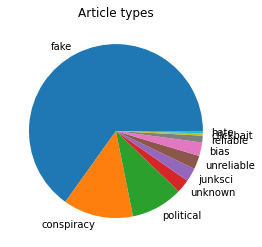

In [6]:
type_counts = data['type'].value_counts()

print(pd.DataFrame({'count': type_counts, 'percentage': type_counts / data.shape[0] * 100}))

type_counts.plot(kind='pie', ylabel='', title='Article types');#.figure.show()

A simple observation one can make from the data, is that there seems to be a correlecation between the type of article and the vocabulary size and length of the article. Particulary, we note that for article of type *'hate'*, the article length and vocabaluary size is substantionally smaller than other article types. This type is an outlier of the data, also, there is only one article of such type. Furthermore, the article length and vocabulary size of *'conspiracy'* articles seems to be larger than the rest. However, we see very different result when taking into account the article length, when computing the average vocabulary size for different types of articles, which we call the weighted vocabulary size. With this correction, we see that when corrected for length, vocabulary sizes are largely the same. The type *'hate'* still appears as an outlier, however, conversely of larger vocabulary size, in contrast to before, and 'unknown' article types appearing as having smaller vocabulary sizes than the rest. The outliers could be explained by the previous exploration - the data set is unbalanced with regard to the number of articles for each type. This exploration suggests that when trying to determine article types it may be wiser to simply look at the lengths of articles rather than vocabulary sizes, as the variance between categories seems to be much larger here, compared to weighted vocabulary size. The vocabulary size tells us much more about the article length than it tells us about the article type, and may therefore not be suitable for predicting the article type.

In [7]:
data['len'] = data['tokenized_content'].apply(lambda x: len(x))
data['vocab_size'] = data['stemmed_content'].apply(lambda x: len(set(x)))
data['weighted_vocab_size'] = data['vocab_size'] / data['len']

group = data.groupby('type').agg({'vocab_size': 'mean', 'len': 'mean', 'weighted_vocab_size': 'mean'})

group

,vocab_size,len,weighted_vocab_size
type,,,
bias,173.333333,449.833333,0.393136
clickbait,108.000000,292.000000,0.369863
conspiracy,293.516129,817.548387,0.396012
fake,208.070968,657.367742,0.393693
hate,31.000000,56.000000,0.553571
junksci,140.166667,369.000000,0.432720
political,209.478261,648.869565,0.401492
reliable,164.666667,449.333333,0.406409
unknown,532.833333,2317.666667,0.290753


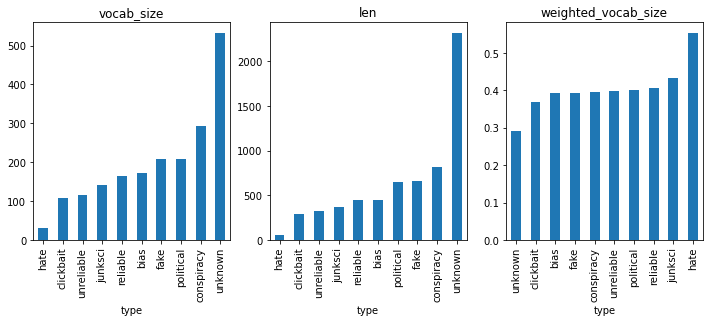

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i,column in enumerate(['vocab_size', 'len', 'weighted_vocab_size']):
    group[column].sort_values().plot(kind='bar', ax=axes[i], title=column)

#fig.show()

A last interesting observation one can make, is the relation between article _type_ and source _domain_. One might not notice this when simply looking through all of the data, but all domains are associated with a unique article type, meaning that all articles stemming from the same domain have the same type. It seems unlikely that this would always be the case in the real world, so one would have to be carefull when using this correspondence in models. In fact, this correspondence may say more about how the labels were given, rather than how to predict the labels for new data points.

In [9]:
print(data['domain'].describe())

data.groupby('domain').agg({'type': pd.unique})

count                   250
unique                   29
top       beforeitsnews.com
freq                    155
Name: domain, dtype: object


,type
domain,
21stcenturywire.com,conspiracy
alternet.org,political
americanlookout.com,bias
anonhq.com,unreliable
awarenessact.com,conspiracy
awm.com,unreliable
barenakedislam.com,hate
beforeitsnews.com,fake
bipartisanreport.com,clickbait


# Task 4

We first calculate the first letter of articles we are supposed to scrape using the formula given.

In [10]:
group_nr = 22
letters = list("ABCDEFGHIJKLMNOPRSTUVWZABCDEFGHIJKLMNOPRSTUVWZ"[group_nr%23:group_nr%23+10])
letters.sort()

letters

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Z']

Next, we then "crawl" through the list of articles, recording the URLs of articles which we are supposed to scrape in a list. To parse the HMTL contents of the pages we use the library `bs4` (BeautifulSoup). On each page, we start by finding HTML objects corresponding to links, and recording them if the first letter is in our list of letters, and then find the HTML object corresponding to the "next page" button, and follow the link given by this to the next page, until there are no more pages. Good practice when scraping it to refrain from hammering the website with request, hence, we wait 0.01 seconds between carrying out request.

In [11]:
from bs4 import BeautifulSoup
import time

base_url = 'https://en.wikinews.org'

current_url = '/wiki/Category:Politics_and_conflicts'

article_urls = []

while current_url:
    current_page = requests.get(base_url + current_url)
    soup = BeautifulSoup(current_page.content, 'html.parser')
    article_container = soup.find('div', {'id': 'mw-pages'})
    letter_containers = article_container.find_all('div', {'class': 'mw-category-group'})
    
    for letter_container in letter_containers:
        letter = letter_container.find('h3').text
        if letter in letters:
            for article in letter_container.find_all('a'):
                article_urls.append(article['href'])
    
    next_page = article_container.find('a', string='next page')

    if next_page:
        current_url = next_page['href']
    else:
        current_url = None
    
    time.sleep(0.01)

num_articles = len(article_urls)

print(f'Number of articles: {num_articles}')

article_urls

Number of articles: 3259


['/wiki/A_1-year_long_strike_against_FMC_Novamed:_Women_workers_allege_unfair_treatment',
 '/wiki/A_policeman_is_killed_and_another_one_is_tortured_in_MST_camp,_in_Brazil',
 '/wiki/A_timeline:_Novak,_Rove,_Cooper',
 '/wiki/Abbas_and_Olmert_meet_before_Bush_visit',
 '/wiki/Abbas_fires_security_chiefs_for_failure_to_curb_lawlessness',
 '/wiki/Abbas_orders_more_security_reforms,_hundreds_of_security_officers_to_be_forced_to_retire',
 '/wiki/Abbas,_Sharon_declare_truce_at_Middle_East_summit',
 '/wiki/Abbott_calls_for_independent_boards_to_govern_Australian_hospitals',
 '/wiki/Abbott_labs_ends_dispute_with_Brazilian_government_over_AIDS_drug',
 '/wiki/Abbott_open_to_possible_Australian_assistance_in_Iraq',
 '/wiki/Abducted_German_family_freed_in_Yemen',
 '/wiki/Abhisit_Vejjajiva_administration_on_brink_of_collapse',
 '/wiki/Abkhazia_to_close_border_with_Georgia_following_bomb_blasts',
 '/wiki/Aboriginal_primacy_bill_introduced_to_the_New_South_Wales_legislative_assembly',
 '/wiki/Aboriginal

Having scraped the list of article URLs, we iterate through the list requesting the HTML contents of each page and parse the content using *BeatifulSoup*. Then we find data corresponding to the *url*, *title*, *simple_date*, *full_date*, *content*, *sources*, and *category* for each article URL. This data is then appended, in addition to the time and date at which the data was scraped and updated, to a Pandas data frame. However, it was not possible to find *simple_date* (e.g. 2007-09-17) or *full_date* (e.g. Monday, September 17, 2007) for all articles, without processing the data itself. Therefore some articles will have 'None' in these fields. The *categories* attribute contains a list of "keywords" relevent to the article (e.g. article category) that contains a date. Hence, it would be possible to use this attribute (sometimes also possible with *contents*) to interpolate the missing dates in later pre-processing steps. We specifically chose not to do this when scraping the data, as this would be more suitable in the prepoccesing step and also, we want to provide the raw data from the articles.

In [12]:
from datetime import datetime

wikinews_data = pd.DataFrame(columns=['id', 'url', 'title', 'simple_date', 'full_date', 'content', 'source_texts', 'source_links', 'categories', 'scraped_at', 'updated_at'])

for i, url in enumerate(article_urls):
    if i % 100 == 0:
        print(f"Scraping article {i} of {num_articles}", flush=True)

    page = requests.get(base_url + url)
    soup = BeautifulSoup(page.content, 'html.parser')

    title = soup.find('h1', {'id': 'firstHeading'}).text
    simple_date = soup.find('span', {'id': 'publishDate'})

    if simple_date:
        simple_date = simple_date['title']

    full_date = soup.find('strong', {'class': 'published'})

    if full_date:
        full_date = full_date.text

    body = soup.find('div', {'class': 'mw-parser-output'})

    paragraphs = body.find_all('p', recursive=False)

    content = ""

    for paragraph in paragraphs:
        content += paragraph.text

    sources = body.findAll('span', {'class': 'sourceTemplate'})

    source_texts = []
    source_links = []

    for source in sources:
        source_texts.append(source.text)
        source_links.append(source.find('a')['href'])

    if source_texts == []:
        source_texts = None

    if source_links == []:
        source_links = None

    categories = []
    cat_tags = soup.find('div', {'class': 'mw-normal-catlinks'}).find('ul').findAll('a')

    for cat_tag in cat_tags:
        categories.append(cat_tag.text)
    
    if categories == []:
        categories = None

    scraped_at = datetime.now()

    wikinews_data = wikinews_data.append({'id': i, 'url': base_url + url, 'title': title, 'simple_date': simple_date, 'full_date': full_date, 'content': content, 'source_texts': source_texts, 'source_links': source_links, 'categories': categories, 'scraped_at': scraped_at, 'updated_at': scraped_at}, ignore_index=True)
    
    time.sleep(0.01)

wikinews_data

Scraping article 0 of 3259
Scraping article 100 of 3259
Scraping article 200 of 3259
Scraping article 300 of 3259
Scraping article 400 of 3259
Scraping article 500 of 3259
Scraping article 600 of 3259
Scraping article 700 of 3259
Scraping article 800 of 3259
Scraping article 900 of 3259
Scraping article 1000 of 3259
Scraping article 1100 of 3259
Scraping article 1200 of 3259
Scraping article 1300 of 3259
Scraping article 1400 of 3259
Scraping article 1500 of 3259
Scraping article 1600 of 3259
Scraping article 1700 of 3259
Scraping article 1800 of 3259
Scraping article 1900 of 3259
Scraping article 2000 of 3259
Scraping article 2100 of 3259
Scraping article 2200 of 3259
Scraping article 2300 of 3259
Scraping article 2400 of 3259
Scraping article 2500 of 3259
Scraping article 2600 of 3259
Scraping article 2700 of 3259
Scraping article 2800 of 3259
Scraping article 2900 of 3259
Scraping article 3000 of 3259
Scraping article 3100 of 3259
Scraping article 3200 of 3259


,id,url,title,simple_date,full_date,content,source_texts,source_links,categories,scraped_at,updated_at
0,0,https://en.wikinews.org/wiki/A_1-year_long_str...,A 1-year long strike against FMC Novamed: Wome...,2007-09-17,"Monday, September 17, 2007","Monday, September 17, 2007 \nIn a free trade z...","[Ertuğrul Mavioğlu. ""Serbest bölgede bir yıllı...",[http://www.radikal.com.tr/haber.php?haberno=2...,"[September 17, 2007, Articles with broken sour...",2021-03-05 08:43:40.409399,2021-03-05 08:43:40.409399
1,1,https://en.wikinews.org/wiki/A_policeman_is_ki...,A policeman is killed and another one is tortu...,2005-02-16,"Wednesday, February 16, 2005","Wednesday, February 16, 2005 \nOn Sunday, Febr...","[Késia Souza. ""SDS reforçará investigação"" — F...",[http://www.folhape.com.br/materia.asp?mat=720...,"[February 16, 2005, Published, Archived, Brazi...",2021-03-05 08:43:40.606615,2021-03-05 08:43:40.606615
2,2,https://en.wikinews.org/wiki/A_timeline:_Novak...,"A timeline: Novak, Rove, Cooper",2005-07-15,"Friday, July 15, 2005","Friday, July 15, 2005 \nThe Novak story that s...","[David Johnston and Richard W. Stevenson. ""Sou...","[http://www.dfw.com/mld/dfw/12139861.htm, http...","[July 15, 2005, Iraq War, Iraq, Politics and c...",2021-03-05 08:43:40.829929,2021-03-05 08:43:40.829929
3,3,https://en.wikinews.org/wiki/Abbas_and_Olmert_...,Abbas and Olmert meet before Bush visit,2008-01-08,"Tuesday, January 8, 2008","Tuesday, January 8, 2008 \nIsraeli Prime Minis...","[Jim Teeple. ""Abbas, Olmert Meet Before Bush V...",[http://www.voanews.com/english/2008-01-08-voa...,"[January 8, 2008, Published, Archived, Middle ...",2021-03-05 08:43:41.040659,2021-03-05 08:43:41.040659
4,4,https://en.wikinews.org/wiki/Abbas_fires_secur...,Abbas fires security chiefs for failure to cur...,2005-04-02,"Saturday, April 2, 2005","Saturday, April 2, 2005 Palestinian Authority ...","[Mohammed Assadi. ""Abbas Fires Security Chiefs...",[http://www.reuters.com/newsArticle.jhtml?type...,"[April 2, 2005, Published, Archived, Palestine...",2021-03-05 08:43:41.240382,2021-03-05 08:43:41.240382
...,...,...,...,...,...,...,...,...,...,...,...
3254,3254,https://en.wikinews.org/wiki/Zimbabwean_politi...,Zimbabwean politician Bennett and four others ...,2018-01-19,"Friday, January 19, 2018","Friday, January 19, 2018 Roy Bennett, a key Zi...","[Farai Mutsaka. ""Zimbabwe mourns Bennett, ‘sha...",[https://apnews.com/1825d1323f3b40d7b082086671...,"[January 19, 2018, Published, Archived, Africa...",2021-03-05 09:04:50.954543,2021-03-05 09:04:50.954543
3255,3255,https://en.wikinews.org/wiki/Zimbabwean_rivals...,Zimbabwean rivals sign power sharing deal,2008-09-15,"Monday, September 15, 2008","Monday, September 15, 2008 \nZimbabwean presid...","[ ""Zimbabwe rivals in historic pact"" — BBC New...",[http://news.bbc.co.uk/1/hi/world/africa/76159...,"[September 15, 2008, Audio reports, Zimbabwe, ...",2021-03-05 09:04:51.191063,2021-03-05 09:04:51.191063
3256,3256,https://en.wikinews.org/wiki/Zimbabwean_unity_...,Zimbabwean unity talks fail,2008-10-05,"Sunday, October 5, 2008","Sunday, October 5, 2008 \nTalks between Zimbab...","[ ""Zimbabwe unity cabinet talks fail"" — BBC Ne...",[http://news.bbc.co.uk/1/hi/world/africa/76530...,"[October 5, 2008, Published, Zimbabwe, Politic...",2021-03-05 09:04:51.349416,2021-03-05 09:04:51.349416
3257,3257,https://en.wikinews.org/wiki/Zinaida_Greceanii...,Zinaida Greceanii nominated Moldovan Prime Min...,2008-03-21,"Friday, March 21, 2008","Friday, March 21, 2008 President Vladimir Voro...","[ ""Президент подписал указ о назначении Зинаид...",[http://www.newsmoldova.ru/news.html?nws_id=68...,"[March 21, 2008, Published, Archived, Moldova,...",2021-03-05 09:04:51.547439,2021-03-05 09:04:51.547439


With the scraping complete, we save a local copy of the data to a CSV file, to avoid having to scrape the data again unnecessarily.

In [13]:
wikinews_data.to_csv('wikinews_data.csv')

Lastly we ensure that the local copy can be read, and print some basic statistics of the scraped data, along with a count of missing values, and some sample rows, to give an overview of the data that has been gathered.

In [14]:
wikinews_data = pd.read_csv('wikinews_data.csv', index_col=0)

print(f'Number of scraped articles: {wikinews_data.shape[0]}, number of scraped attributes: {wikinews_data.shape[1]}')

# TODO: find null
print('\nMissing values:')
print(pd.DataFrame({'count': wikinews_data.isnull().sum(), 'percentage': wikinews_data.isnull().sum() / wikinews_data.shape[0] * 100}))


print('\nSamples from scraped data:')

wikinews_data.head()

Number of scraped articles: 3259, number of scraped attributes: 11

Missing values:
              count  percentage
id                0    0.000000
url               0    0.000000
title             0    0.000000
simple_date      30    0.920528
full_date        30    0.920528
content           2    0.061369
source_texts    154    4.725376
source_links    154    4.725376
categories        0    0.000000
scraped_at        0    0.000000
updated_at        0    0.000000

Samples from scraped data:


,id,url,title,simple_date,full_date,content,source_texts,source_links,categories,scraped_at,updated_at
0,0,https://en.wikinews.org/wiki/A_1-year_long_str...,A 1-year long strike against FMC Novamed: Wome...,2007-09-17,"Monday, September 17, 2007","Monday, September 17, 2007 \nIn a free trade z...","['Ertuğrul Mavioğlu. ""Serbest bölgede bir yıll...",['http://www.radikal.com.tr/haber.php?haberno=...,"['September 17, 2007', 'Articles with broken s...",2021-03-05 08:43:40.409399,2021-03-05 08:43:40.409399
1,1,https://en.wikinews.org/wiki/A_policeman_is_ki...,A policeman is killed and another one is tortu...,2005-02-16,"Wednesday, February 16, 2005","Wednesday, February 16, 2005 \nOn Sunday, Febr...","['Késia Souza. ""SDS reforçará investigação"" —\...",['http://www.folhape.com.br/materia.asp?mat=72...,"['February 16, 2005', 'Published', 'Archived',...",2021-03-05 08:43:40.606615,2021-03-05 08:43:40.606615
2,2,https://en.wikinews.org/wiki/A_timeline:_Novak...,"A timeline: Novak, Rove, Cooper",2005-07-15,"Friday, July 15, 2005","Friday, July 15, 2005 \nThe Novak story that s...","['David Johnston and Richard W. Stevenson. ""So...","['http://www.dfw.com/mld/dfw/12139861.htm', 'h...","['July 15, 2005', 'Iraq War', 'Iraq', 'Politic...",2021-03-05 08:43:40.829929,2021-03-05 08:43:40.829929
3,3,https://en.wikinews.org/wiki/Abbas_and_Olmert_...,Abbas and Olmert meet before Bush visit,2008-01-08,"Tuesday, January 8, 2008","Tuesday, January 8, 2008 \nIsraeli Prime Minis...","['Jim Teeple. ""Abbas, Olmert Meet Before Bush ...",['http://www.voanews.com/english/2008-01-08-vo...,"['January 8, 2008', 'Published', 'Archived', '...",2021-03-05 08:43:41.040659,2021-03-05 08:43:41.040659
4,4,https://en.wikinews.org/wiki/Abbas_fires_secur...,Abbas fires security chiefs for failure to cur...,2005-04-02,"Saturday, April 2, 2005","Saturday, April 2, 2005 Palestinian Authority ...","['Mohammed Assadi. ""Abbas Fires Security Chief...",['http://www.reuters.com/newsArticle.jhtml?typ...,"['April 2, 2005', 'Published', 'Archived', 'Pa...",2021-03-05 08:43:41.240382,2021-03-05 08:43:41.240382


In this project, we will assume the scraped data, and in turn the articles, are from a trusted source and should all be considered as true articles. This would suggest that Wikinews.org, which is the website we scraped the data from, is a reliable source of data, however, this is not necessarily the case. There are several reasons for this. For one, the website itslf scrapes articles from external sources. It is not possible to verify that all of these source sites only produce true articles. Secondly, it can also be hard to verify that the article presented by Wikinews.org is indeed the exact same as the original article, and has not been edited before being presented. However, according to Wikinews.org itself, "We are a group of volunteers whose mission is to present reliable, unbiased and relevant news", so if one belives that, the assumption is not totally outrageous, but it is likely not 100% correct.